# Que 1. Which state we should target for EV vehicles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [24]:
dummy=pd.read_excel("type_TN.xlsx",skiprows=[0,2])

In [25]:
dummy

,S No,Vehicle Class,Fuel,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,TOTAL
0,NaN,NaN,CNG ONLY,DIESEL,DIESEL/HYBRID,DI-METHYL ETHER,DUAL DIESEL/BIO CNG,DUAL DIESEL/CNG,DUAL DIESEL/LNG,ELECTRIC(BOV),...,METHANOL,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,PETROL/METHANOL,SOLAR,NaN
1,1.0,ADAPTED VEHICLE,0,205,0,0,0,0,0,2,...,0,11,"20,616",2,0,26,35,0,0,"20,897"
2,2.0,AGRICULTURAL TRACTOR,0,"4,29,024",0,0,0,0,0,390,...,0,"1,166","2,282",0,0,0,59,0,0,"4,33,043"
3,3.0,AMBULANCE,0,"9,465",0,0,0,0,0,5,...,0,10,"4,213",0,0,0,75,0,0,"13,769"
4,4.0,ANIMAL AMBULANCE,0,60,0,0,0,0,0,0,...,0,1,15,0,0,0,0,0,0,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,64.0,TREE TRIMMING VEHICLE,0,34,0,0,0,0,0,0,...,0,4,3,0,0,0,0,0,0,41
65,65.0,VEHICLE FITTED WITH COMPRESSOR,0,"10,657",0,0,0,0,0,2,...,0,4,78,0,0,0,0,0,0,"10,741"
66,66.0,VEHICLE FITTED WITH GENERATOR,0,"1,336",0,0,0,0,0,1,...,0,10,39,0,0,0,1,0,0,"1,387"
67,67.0,VEHICLE FITTED WITH RIG,0,"3,923",0,0,0,0,0,0,...,0,3,12,0,0,0,0,0,0,"3,938"


In [28]:
dummy.drop(dummy.columns[0],axis=1,inplace=True)

In [29]:
dummy_clm = dummy.iloc[0,1:].tolist()

In [30]:
dummy_clm=['Vehicle Class'] + dummy_clm

In [31]:
dummy_clm

['Vehicle Class',
 'CNG ONLY',
 'DIESEL',
 'DIESEL/HYBRID',
 'DI-METHYL ETHER',
 'DUAL DIESEL/BIO CNG',
 'DUAL DIESEL/CNG',
 'DUAL DIESEL/LNG',
 'ELECTRIC(BOV)',
 'ETHANOL',
 'FUEL CELL HYDROGEN',
 'LNG',
 'LPG ONLY',
 'METHANOL',
 'NOT APPLICABLE',
 'PETROL',
 'PETROL/CNG',
 'PETROL/ETHANOL',
 'PETROL/HYBRID',
 'PETROL/LPG',
 'PETROL/METHANOL',
 'SOLAR',
 nan]

# The data contains all the above columns but we are mainly focusing on
1. Vehicle Class
2. CNG only
3. Diesel
4. Electric(BOV)
5. Petrol

In [32]:
#This function will helps us to get required columns from the dataset
def get_data(df):
    df1 = pd.read_excel(df,skiprows = [0,2])
    df1.drop(df1.columns[0],axis=1,inplace=True)
    new_clm = df1.iloc[0,1:].tolist()
    df1.columns=['Vehicle Class'] + new_clm
    df1.iloc[1:].reset_index(drop=True)
    df1 = df1[["Vehicle Class","CNG ONLY","DIESEL","ELECTRIC(BOV)","PETROL"]]
    df1=df1.drop(df1.index[0])
    return df1
    

In [33]:
get_data("type_TN.xlsx")

,Vehicle Class,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
1,ADAPTED VEHICLE,0,205,2,"20,616"
2,AGRICULTURAL TRACTOR,0,"4,29,024",390,"2,282"
3,AMBULANCE,0,"9,465",5,"4,213"
4,ANIMAL AMBULANCE,0,60,0,15
5,ARMOURED/SPECIALISED VEHICLE,0,2,0,0
...,...,...,...,...,...
64,TREE TRIMMING VEHICLE,0,34,0,3
65,VEHICLE FITTED WITH COMPRESSOR,0,"10,657",2,78
66,VEHICLE FITTED WITH GENERATOR,0,"1,336",1,39
67,VEHICLE FITTED WITH RIG,0,"3,923",0,12


This is how the raw data looks like

# The data contains all type of vehicles, but here we are focussing on only the following types:

1. BUS
2. E-RICKSHAW(P)
3. M-CYCLE/SCOOTER
4. M-CYCLE/SCOOTER-WITH SIDE CAR
5. MOPED
6. MOTOR CAB
7. MOTOR CAR
8. OMNI BUS
9. THREE WHEELER (GOODS)
10. THREE WHEELER (PASSENGER)
11. THREE WHEELER (PERSONAL)
12. E-RICKSHAW WITH CART (G)

In [34]:
# list of main vehicle spaces to target
imp_vehicle = ["BUS", "E-RICKSHAW(P)","M-CYCLE/SCOOTER","M-CYCLE/SCOOTER-WITH SIDE CAR","MOPED","MOTOR CAB","MOTOR CAR",
               "OMNI BUS","THREE WHEELER (GOODS)","THREE WHEELER (PASSENGER)","THREE WHEELER (PERSONAL)",
               "E-RICKSHAW WITH CART (G)"]

In [35]:
"""
 This function combines the data for electric vehicle across all states
"""
def get_all_data(state,state_name):

    data = get_data(state)
    idx = []
    for i in range(data.shape[0]):
        if data.iloc[i]['Vehicle Class'] in imp_vehicle:
            idx.append(i)
    frame = data.iloc[idx]
    new_frame = frame.reset_index().drop(["index"], axis=1)
    new_frame["ELECTRIC(BOV)"] = [z.replace(',','') for z in new_frame["ELECTRIC(BOV)"].values]
    new_frame["ELECTRIC(BOV)"] = new_frame["ELECTRIC(BOV)"].astype(float)
    new_frame['State'] = [state_name for i in range(new_frame.shape[0])]
    return new_frame[["ELECTRIC(BOV)","State"]]

In [36]:
# list of name of csv files of every state
data_files = ["type_AP.xlsx","type_assam.xlsx","type_bihar.xlsx","type_chandigarh.xlsx","type_chhatisgarh.xlsx",
              "type_Delhi.xlsx","type_guj.xlsx","type_haryana.xlsx","type_HP.xlsx","type_jammu.xlsx","type_karnataka.xlsx",
              "type_kerala.xlsx","type_maharashtra.xlsx","type_meghalaya.xlsx","type_MP.xlsx","type_odisha.xlsx",
              "type_puducherry.xlsx","type_rajasthan.xlsx","type_sikkim.xlsx","type_TN.xlsx","type_UP.xlsx",
              "type_uttarakhand.xlsx","type_WB.xlsx"]

In [37]:
# list of state names, these will be column values
states = ["Andhra Pradesh","Assam","Bihar","Chandigarh","Chhatisgarh","Delhi","Gujarat","Haryana","Himachal Pradesh",
         "Jammu & Kashmir","Karnataka","Kerala","Maharashtra","Meghalaya","Madhya Pradesh","Odisha","Puducherry",
          "Rajasthan","Sikkim","Tamil Nadu","Uttar Pradesh","Uttarakhand","West Bengal"]

In [38]:
# storing each dataframe to concatenate in the below list
concat_states = []
for i,j in zip(data_files,states):
    concat_states.append(get_all_data(i,j)) # calling the above defined function

In [39]:
final_df = pd.concat(concat_states,axis = 0) # concatenating all the dataframes (by rows)

In [40]:
final_df

,ELECTRIC(BOV),State
0,0.0,Andhra Pradesh
1,397.0,Andhra Pradesh
2,260.0,Andhra Pradesh
3,10718.0,Andhra Pradesh
4,601.0,Andhra Pradesh
...,...,...
7,1117.0,West Bengal
8,0.0,West Bengal
9,377.0,West Bengal
10,392.0,West Bengal


In [41]:
mean_ev = final_df.groupby(by = "State").mean() # group by each state and return the average number of EV being used

# Average number of electric vehicles across all states

<Axes: title={'center': 'Mean of Electric Vehicles'}, ylabel='State'>

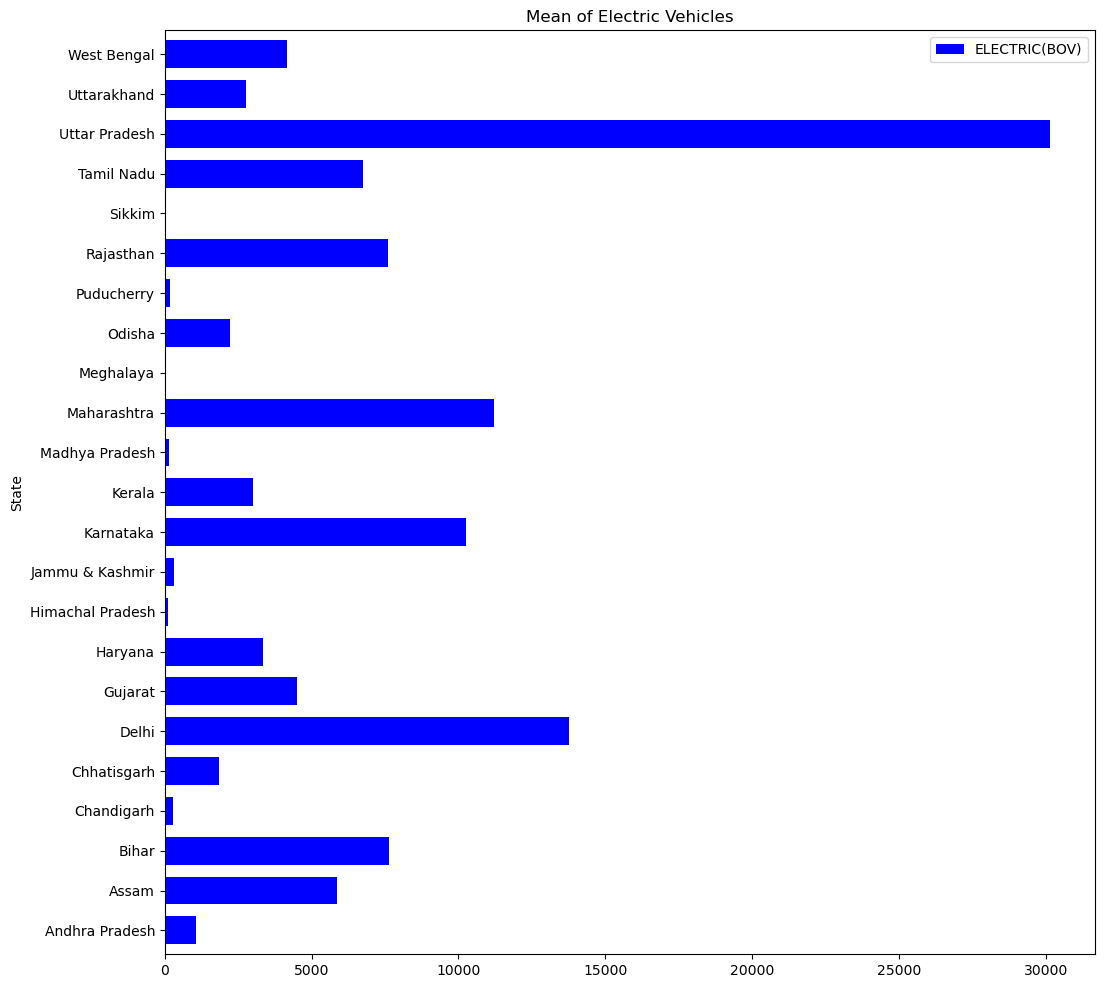

In [42]:
mean_ev.plot.barh(figsize = (12,12), width = 0.7,title = 'Mean of Electric Vehicles', color = 'blue')

# From above visualization we got the idea whic state we should target 
1. Maharashtra
2. Uttar Pradesh
3. Karnataka
4. Gujarat
5. Delhi
6. Rajasthan
7. Haryana


# Que. 2. Which EV vehicle will be suitable in the targeted state

In [43]:
"""
This function returns the dataframe with important fuel types and rows containing the
vehicle spaces to target
"""
def get_imp_vehicle(state):

    data = get_data(state)
    idx = []
    for i in range(data.shape[0]):
        if data.iloc[i]['Vehicle Class'] in imp_vehicle:
            idx.append(i)
    frame = data.iloc[idx]
    new_frame = frame.reset_index().drop(["index"], axis=1)
    
    # cleaning the numerical features (Example : 12,200 is converted to 12200)
    
    new_frame["CNG ONLY"] = [z.replace(',','') for z in new_frame["CNG ONLY"].values]
    new_frame["DIESEL"] = [z.replace(',','') for z in new_frame["DIESEL"].values]
    new_frame["ELECTRIC(BOV)"] = [z.replace(',','') for z in new_frame["ELECTRIC(BOV)"].values]
    new_frame["PETROL"] = [z.replace(',','') for z in new_frame["PETROL"].values]
    
    # the numerical features are string type, so converting them to float
    
    new_frame["CNG ONLY"] = new_frame["CNG ONLY"].astype(float)
    new_frame["DIESEL"] =  new_frame["DIESEL"].astype(float)
    new_frame["ELECTRIC(BOV)"] = new_frame["ELECTRIC(BOV)"].astype(float)
    new_frame["PETROL"] = new_frame["PETROL"].astype(float)
        
    return new_frame

# State:1 Maharashtra

In [45]:
mah = get_imp_vehicle("type_maharashtra.xlsx")
mah

,Vehicle Class,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
0,BUS,7515.0,109628.0,1116.0,1916.0
1,E-RICKSHAW(P),0.0,30.0,6020.0,108.0
2,E-RICKSHAW WITH CART (G),0.0,0.0,2132.0,0.0
3,M-CYCLE/SCOOTER,0.0,5537.0,106327.0,22876524.0
4,M-CYCLE/SCOOTER-WITH SIDE CAR,0.0,7.0,9.0,6040.0
5,MOPED,0.0,26.0,4092.0,239116.0
6,MOTOR CAB,1542.0,149928.0,798.0,10683.0
7,MOTOR CAR,1094.0,1971766.0,12609.0,2682375.0
8,OMNI BUS,3.0,375.0,0.0,182.0
9,THREE WHEELER (GOODS),6987.0,74826.0,912.0,563.0


<Axes: ylabel='Vehicle Class'>

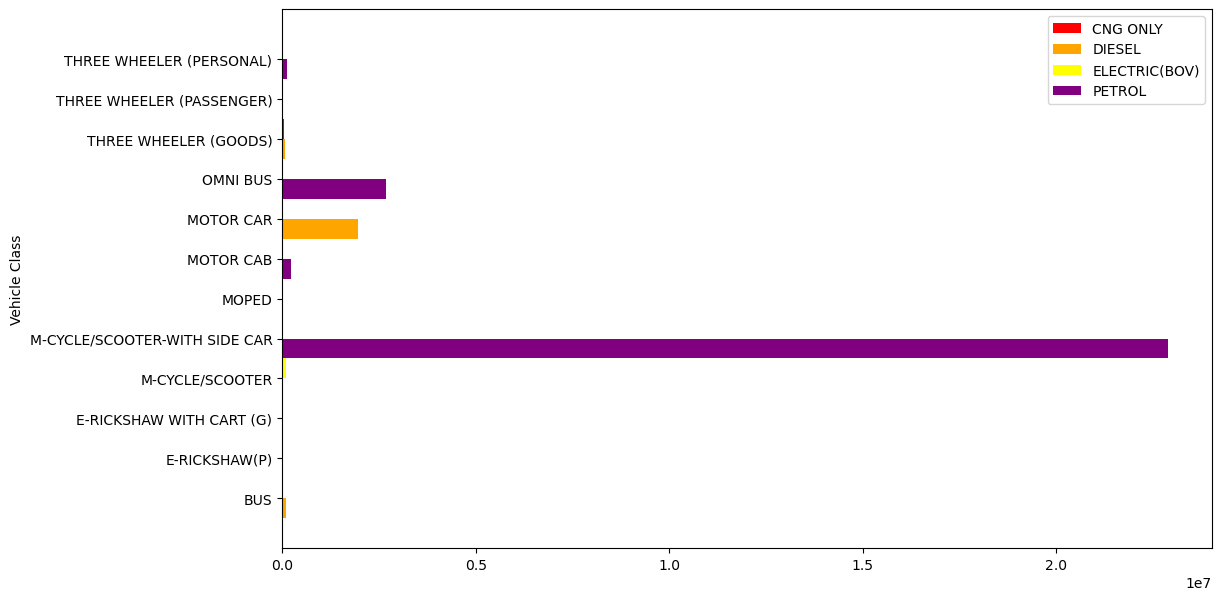

In [54]:
mah.plot.barh(x = 'Vehicle Class', color=("red", "orange", "yellow", "purple"), figsize = (12,7), width = 2.0)

In [51]:
"""
This function helps to plot the bar plot for various features
"""
def plot_frequency(data,feature1,feature2,x_lbl,y_lbl,text,color):

    new_df = data
    new = new_df.sort_values(by=[feature2],ascending=False) # sorting in descending order
    plt.figure(figsize=(14, 8))
    x_state = list(new[feature1].values) # defining x axis
    y_state = list(new[feature2].values) # defining y axis (count of numericl entity)
    plt.barh(x_state,y_state, color = color)
    plt.xlabel(x_lbl, fontsize=18) # xlabel
    plt.ylabel(y_lbl, fontsize=18) # ylabel
    plt.title(text, fontsize = 18)
    return plt.show() 

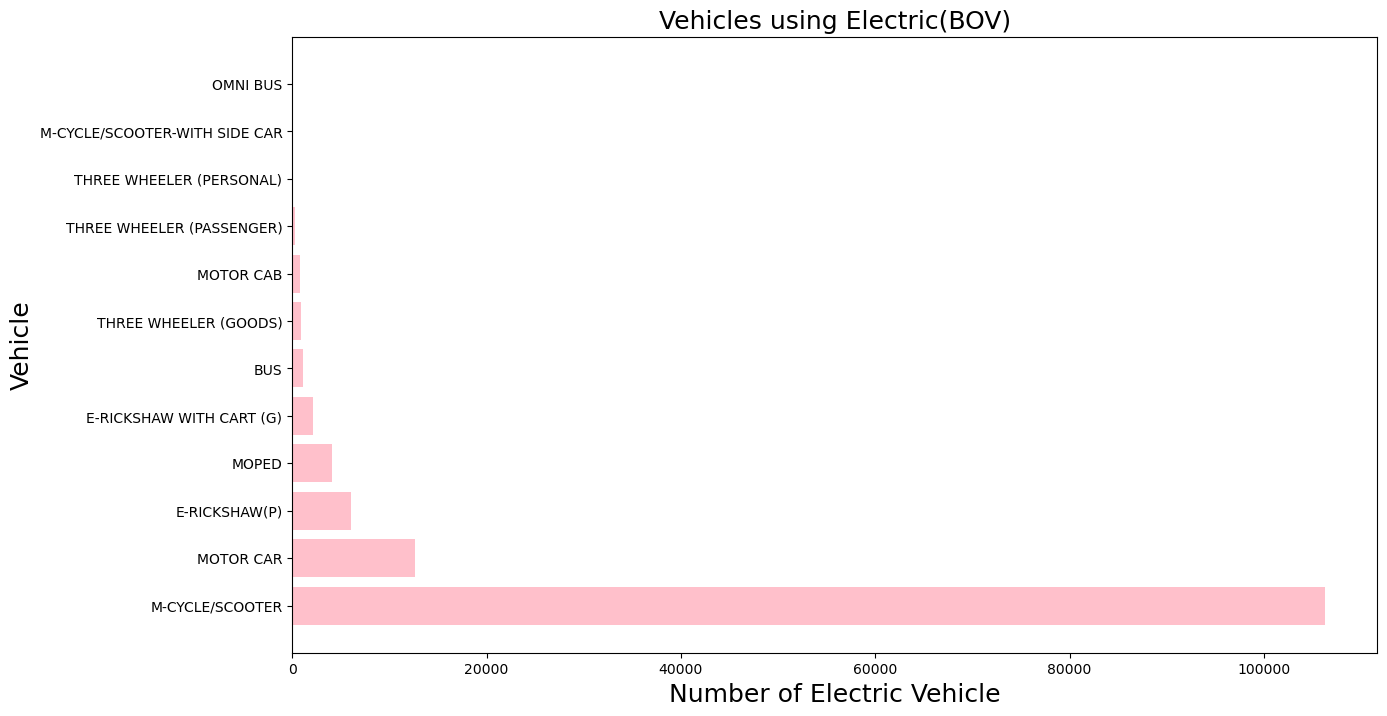

In [55]:
plot_frequency(mah,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','pink')

 Above visualization show us all which vehicle segment we should target in Maharashtra

# State:2 Uttar Pradesh

In [53]:
up = get_imp_vehicle("type_UP.xlsx")

<Axes: ylabel='Vehicle Class'>

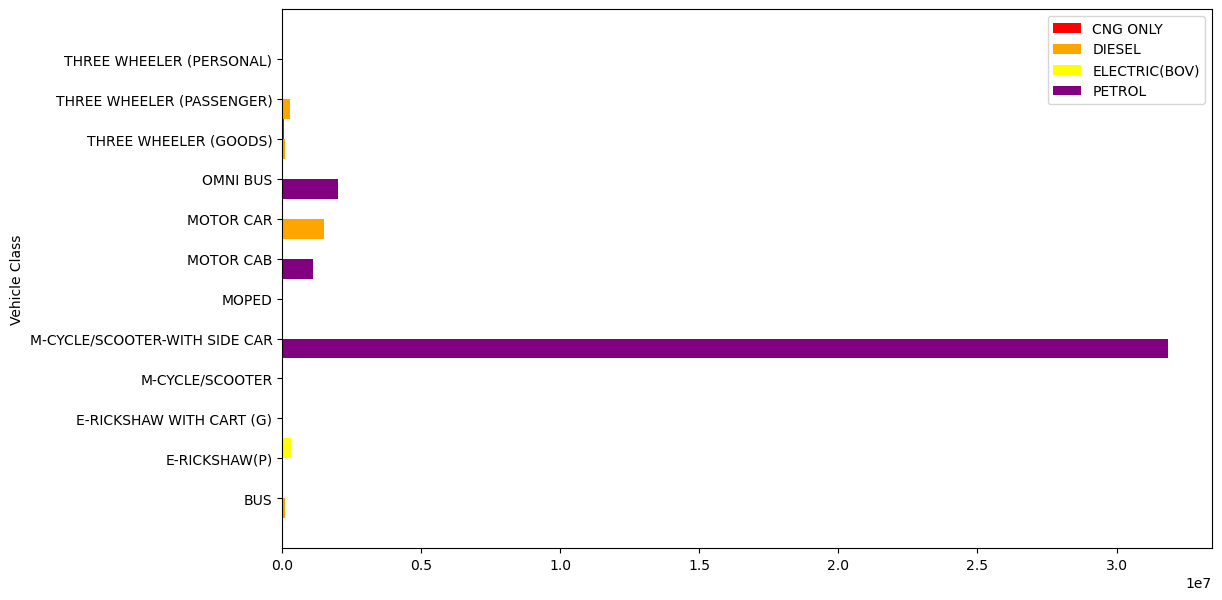

In [56]:
up.plot.barh(x = 'Vehicle Class', color=("red", "orange", "yellow", "purple"), figsize = (12,7), width = 2.0)

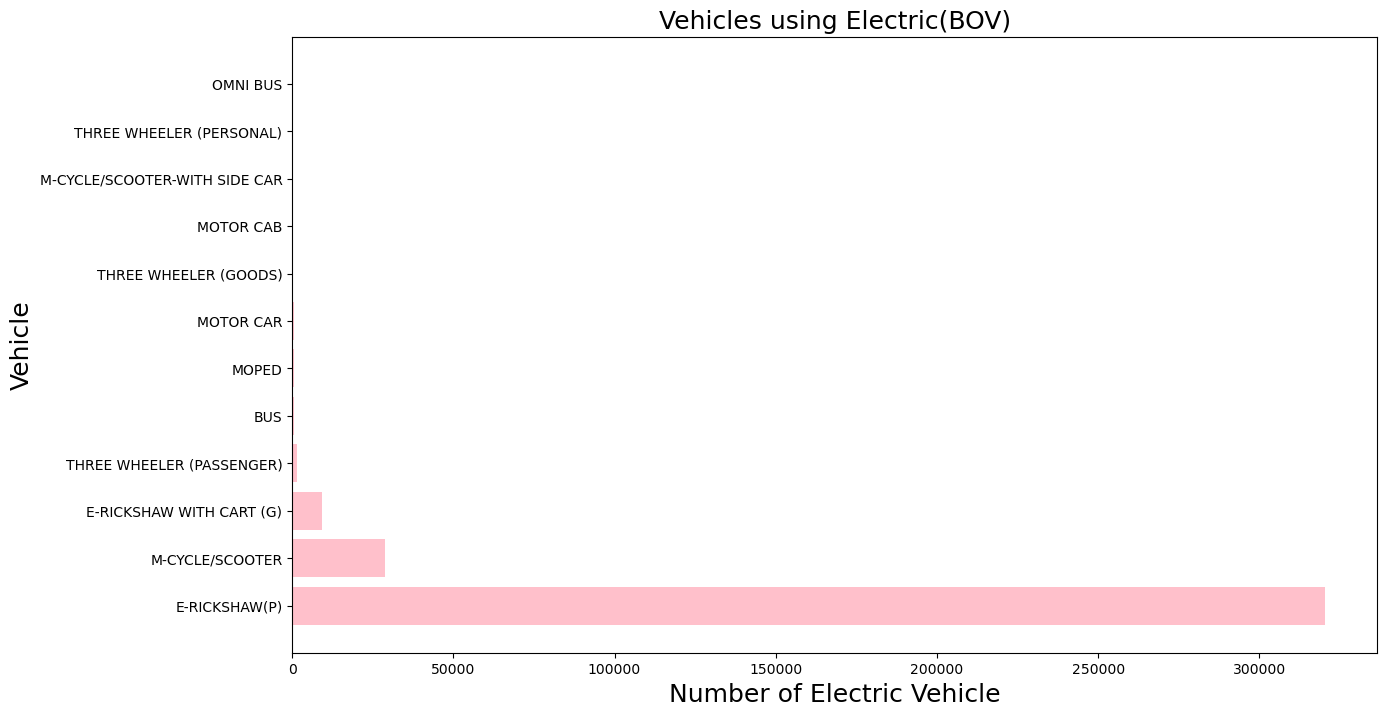

In [57]:
plot_frequency(up,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','pink')

Above visualization shows us which vehicle segment we should target in uttar pradesh

# State:3 Delhi

In [58]:
delhi = get_imp_vehicle("type_Delhi.xlsx")

<Axes: ylabel='Vehicle Class'>

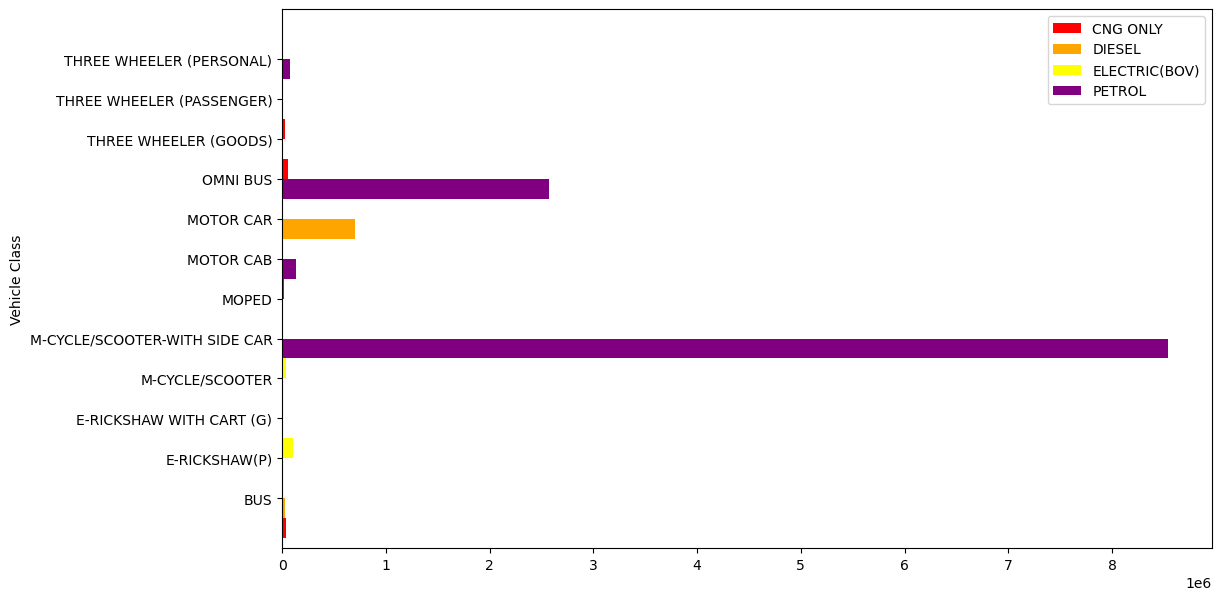

In [59]:
delhi.plot.barh(x = 'Vehicle Class', color=("red", "orange", "yellow", "purple"), figsize = (12,7), width = 2.0)

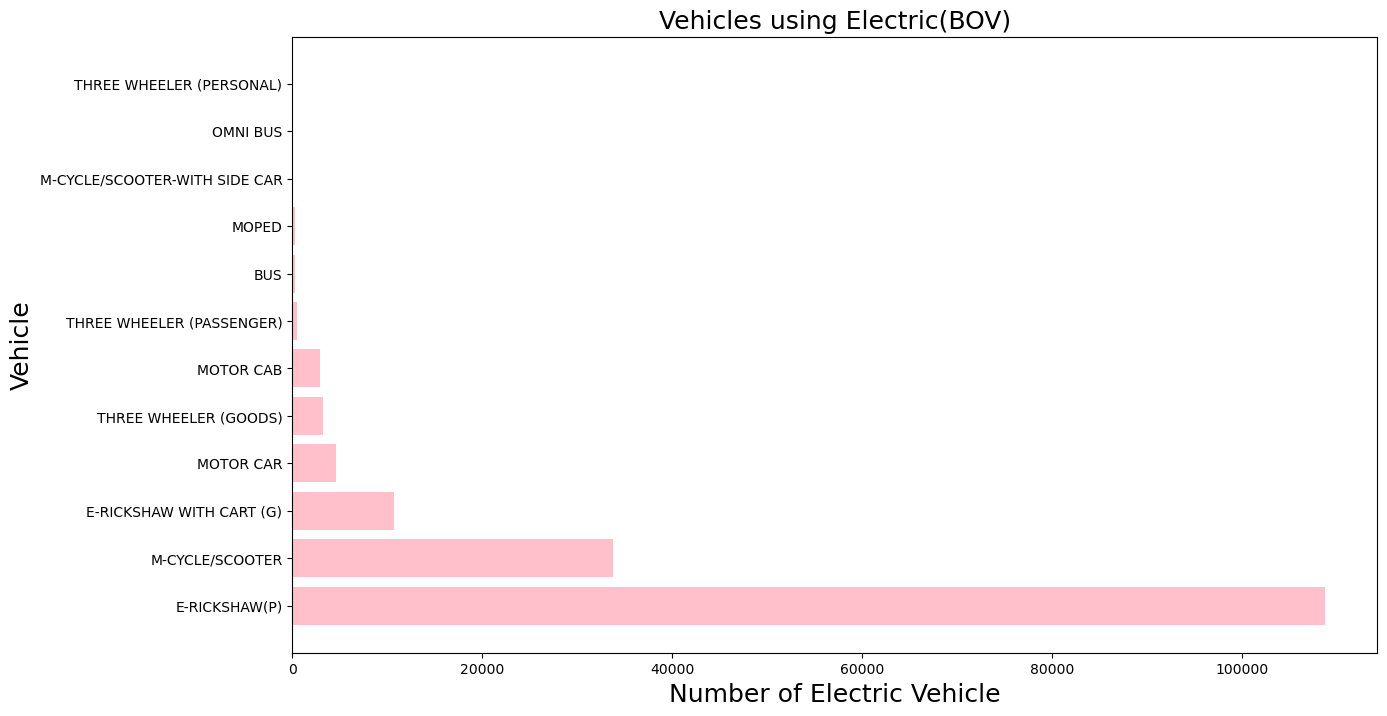

In [61]:
plot_frequency(delhi,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','pink')

Above visualization gives us insight about which vehicle segment we should target in delhi

# State:4 Karnataka

In [63]:
ktk = get_imp_vehicle("type_karnataka.xlsx")

<Axes: ylabel='Vehicle Class'>

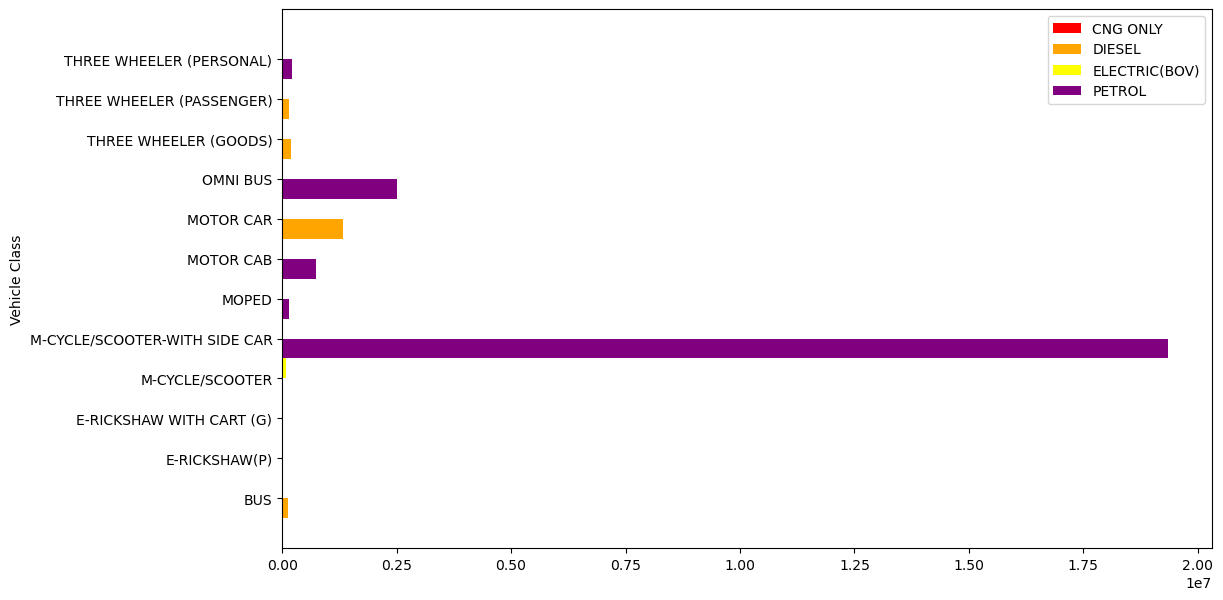

In [64]:
ktk.plot.barh(x = 'Vehicle Class', color=("red", "orange", "yellow", "purple"), figsize = (12,7), width = 2.0)

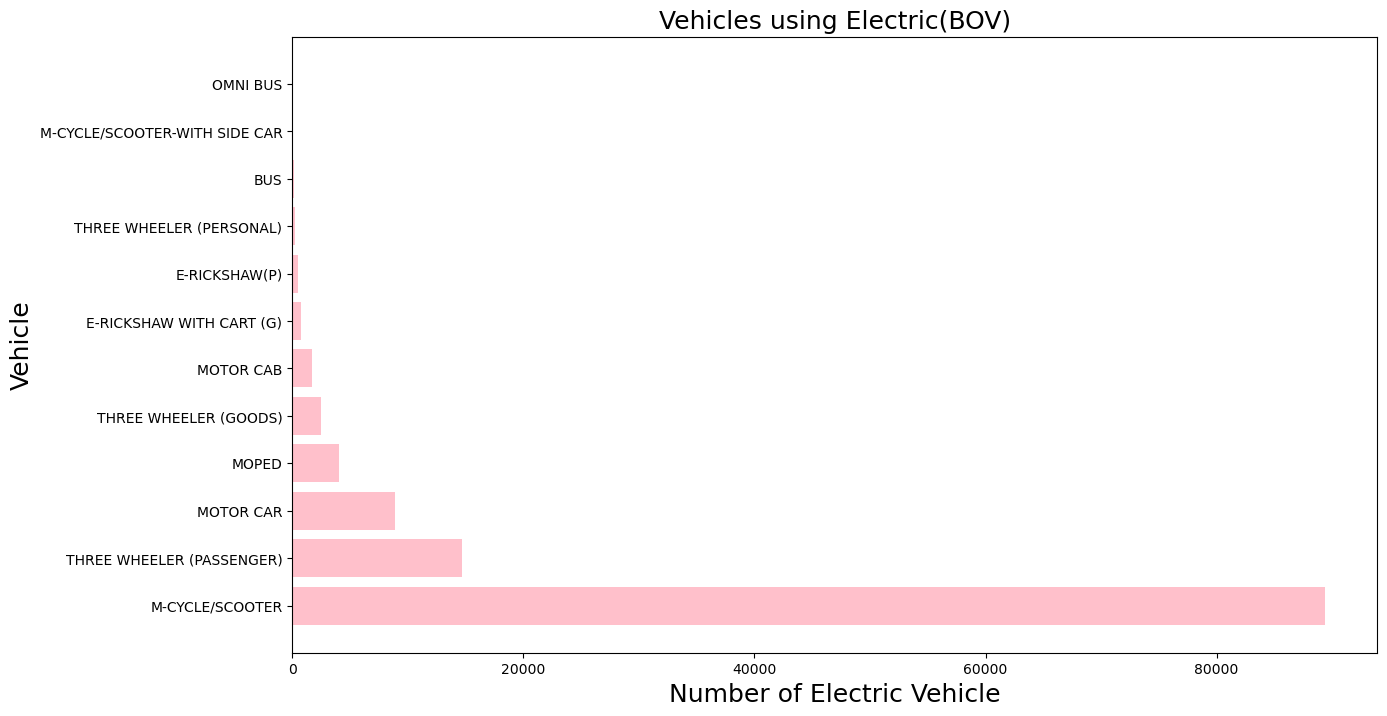

In [65]:
plot_frequency(ktk,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','pink')

Above visulaization give us an insight about which vehicle segment should we target in karnataka state

# State:5 Gujrat

In [66]:
guj = get_imp_vehicle("type_guj.xlsx")

<Axes: ylabel='Vehicle Class'>

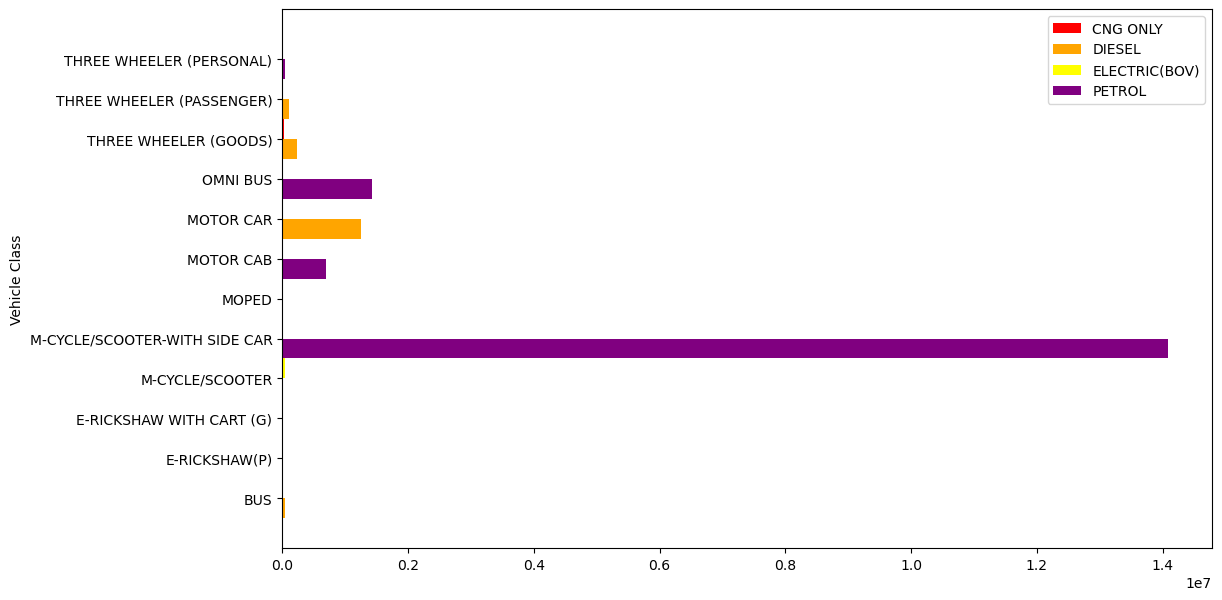

In [67]:
guj.plot.barh(x = 'Vehicle Class', color=("red", "orange", "yellow", "purple"), figsize = (12,7), width = 2.0)

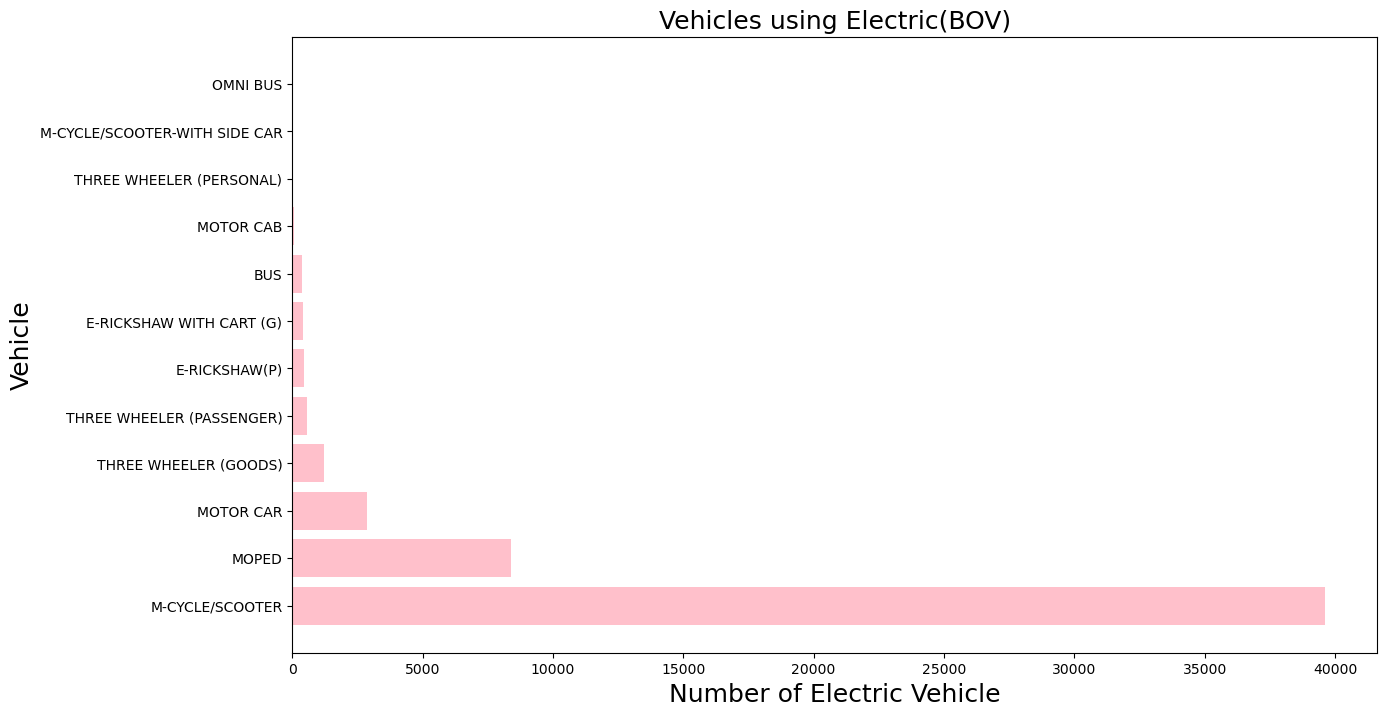

In [68]:
plot_frequency(guj,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','pink')

Above visulaization give us an insight about which vehicle segment should we target in Gujrat state

# State:6 Rajasthan

In [70]:
raj = get_imp_vehicle("type_rajasthan.xlsx")

<Axes: ylabel='Vehicle Class'>

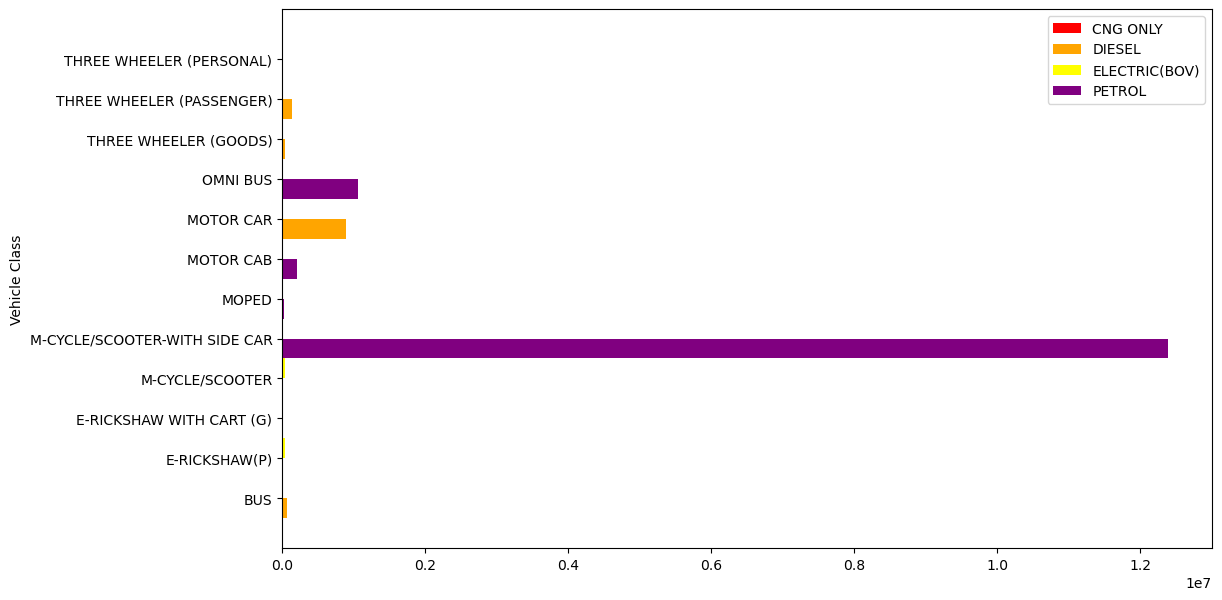

In [71]:
raj.plot.barh(x = 'Vehicle Class', color=("red", "orange", "yellow", "purple"), figsize = (12,7), width = 2.0)

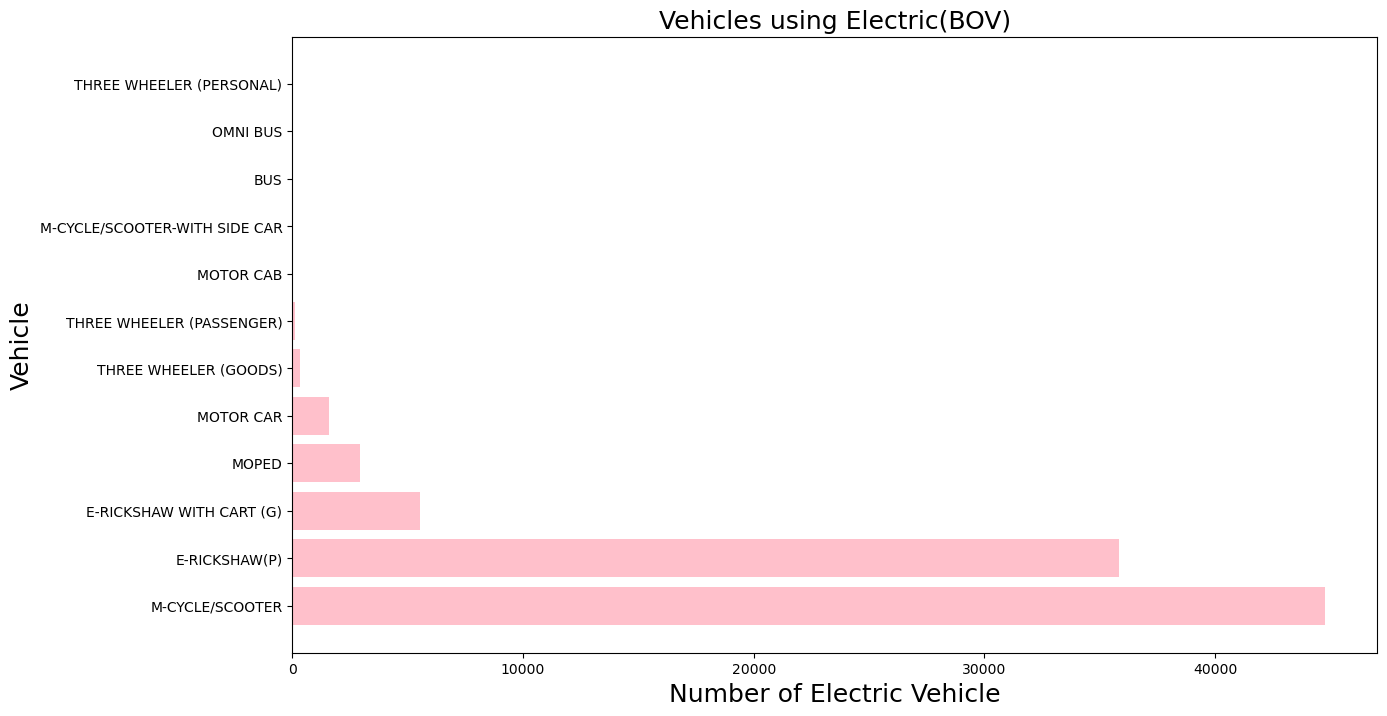

In [72]:
plot_frequency(raj,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','pink')

Above visulaization give us an insight about which vehicle segment should we target in Rajasthan state

# State:7. Haryana

In [73]:
har = get_imp_vehicle("type_haryana.xlsx")

<Axes: ylabel='Vehicle Class'>

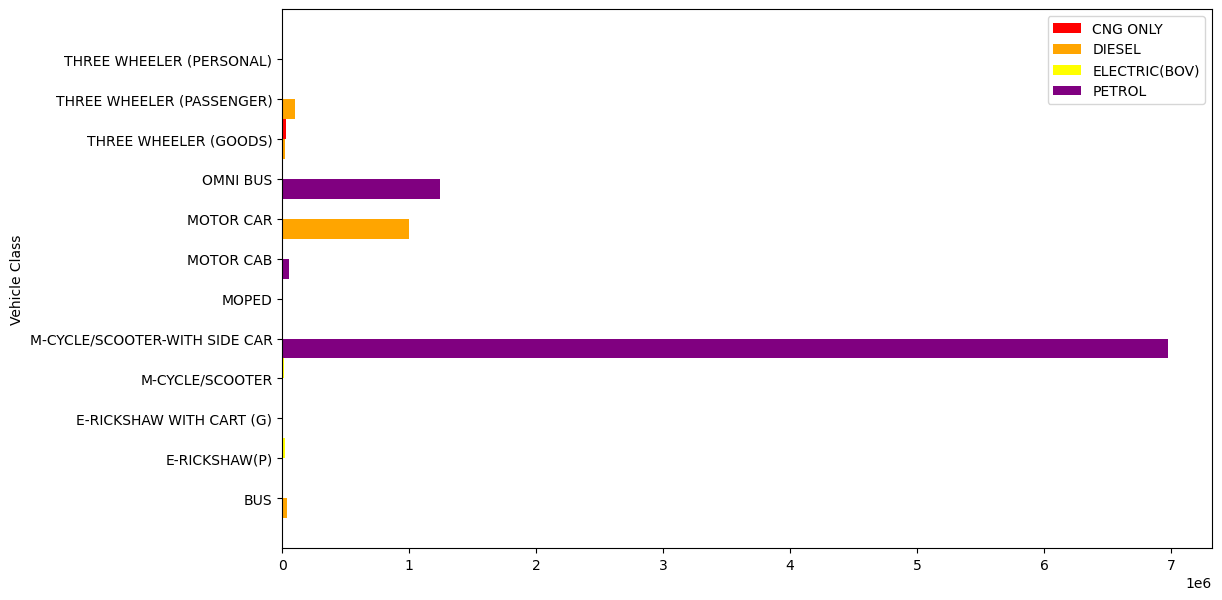

In [74]:
har.plot.barh(x = 'Vehicle Class', color=("red", "orange", "yellow", "purple"), figsize = (12,7), width = 2.0)

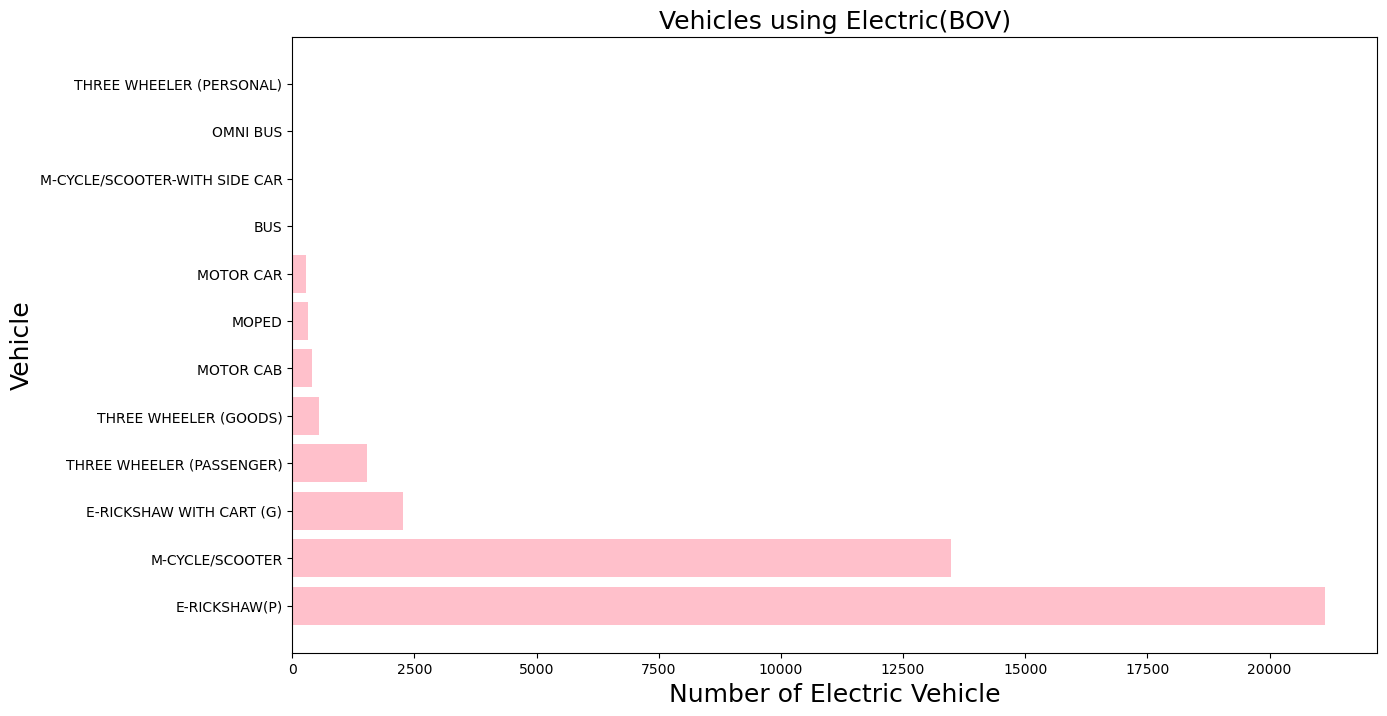

In [75]:
plot_frequency(har,'Vehicle Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','pink')

Above visulaization give us an insight about which vehicle segment should we target in Haryana state